# Convolutional neural network 

<div>
<img src="https://le-cdn.website-editor.net/4b5e1e3a4a364b689c2606ca8c78024d/dms3rep/multi/opt/Amptso-9ccb7a7a-f72ae4be-9277c828-640w.png" width="250"/>
</div>

Prepared by Nicolas Desassis from [Pytorch documentation](https://https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
)


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In this notebook, we will work with the [CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


<div>
<img src="https://pytorch.org/tutorials/_images/cifar10.png" width="500"/>
</div>



In [1]:
transform = transforms.Compose(   [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

NameError: ignored

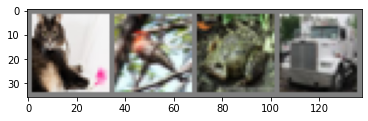

  cat  bird  frog truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#The model

The different parameters of the convolution are explained at this [link](https://github.com/vdumoulin/conv_arithmetic).

We reproduce here their animations by focusing on what is useful for the rest of the notebook. 

Blue maps are inputs, and cyan maps are outputs. 

<div>
<img src="https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/no_padding_no_strides.gif?raw=true" width="100"/><figcaption><b> 2d convolution with stride = 1 and padding = 0 (valid)<b/></figcaption>
</div>



<div>
<img src="https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/same_padding_no_strides.gif?raw=true" width="100"/><figcaption><b> 2d convolution with stride = 1 and padding of 1
 which ensurs that the output image as the same size than the input with a 3 x 3 kernel<b/></figcaption>
</div>



**Model**

Exercice: replace None by the correct dimension


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        #Convolutional layers

        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 5, stride = 1, padding = 0)
        self.conv2 = nn.Conv2d(in_channels =16, out_channels = 32, kernel_size = 5)#stride = 1, padding = 0
        
        #Max-pooling layer

        self.pool = nn.MaxPool2d(2, 2)
        
        #Fully connected layers
        ########################
        #Your code Here
        self.fc1input = 32 * 5 * 5
        #########################
        self.fc1 = nn.Linear(self.fc1input, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.fc1input) #Flatten the images in a vector
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = nn.LogSoftmax(dim=1)(x)
        return x



net = Net()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)
net = net.to(device)
criterion = nn.NLLLoss().to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

cuda:0


In [ ]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10000 == 9999:    # print every 10000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10000))
            running_loss = 0.0

print('Finished Training')

[1, 10000] loss: 1.532
[2, 10000] loss: 1.205
[3, 10000] loss: 1.089
[4, 10000] loss: 1.013
[5, 10000] loss: 0.961
[6, 10000] loss: 0.924
[7, 10000] loss: 0.884
[8, 10000] loss: 0.853
[9, 10000] loss: 0.830


KeyboardInterrupt: ignored

In [ ]:
PATH = './cifar_net.pth'

In [ ]:

torch.save(net.state_dict(), PATH)

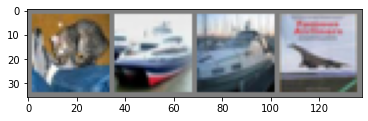

GroundTruth:    cat  ship  ship plane


In [ ]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net().to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images.to(device))

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship plane


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 64 %


In [ ]:
confusion = np.zeros((10,10)).astype(int)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels.to(device)).squeeze()
        
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            confusion[labels[i],predicted[i]]+=1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 86 %
Accuracy of  bird : 48 %
Accuracy of   cat : 45 %
Accuracy of  deer : 50 %
Accuracy of   dog : 47 %
Accuracy of  frog : 80 %
Accuracy of horse : 84 %
Accuracy of  ship : 68 %
Accuracy of truck : 66 %


### Confusion matrix

The lines indicate the true label, the columns indicate the predicted label.

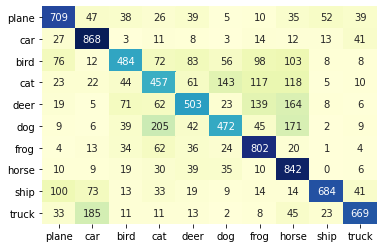

In [ ]:
import seaborn as sns
sns.heatmap(confusion,cmap="YlGnBu", annot=True, fmt=".4g",cbar=False,xticklabels=classes, yticklabels=classes)

## Display the weights

### Weights of the first layer

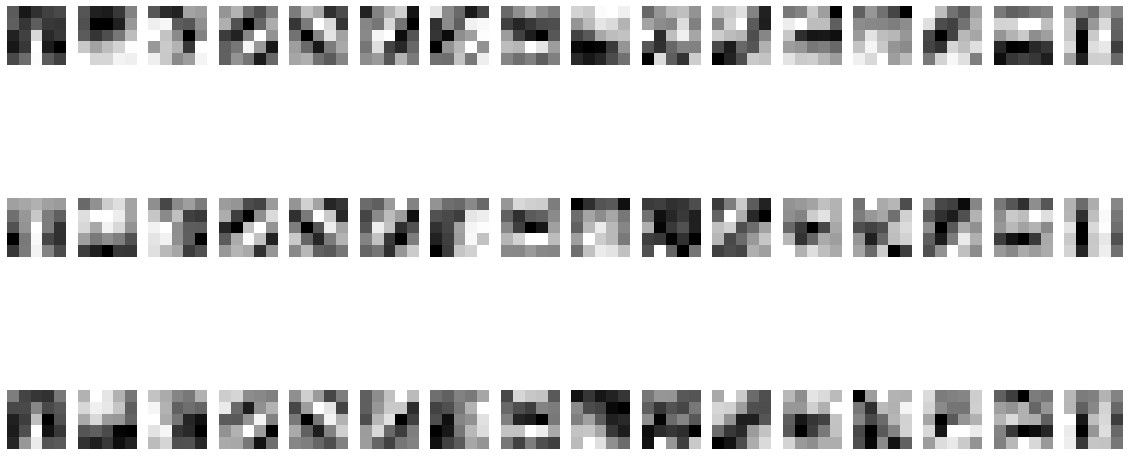

In [ ]:
nw1 = len(net.conv1.weight)
plt.figure(figsize=(20,10))
for index in range(nw1):
    for ichan in range(3):
      plt.subplot(3, nw1, nw1 * ichan + index + 1)
      plt.axis('off')
      plt.imshow(net.conv1.weight[index].cpu().detach().numpy().squeeze()[ichan,:], cmap='gray_r')
plt.show()

### Weights of the second layer

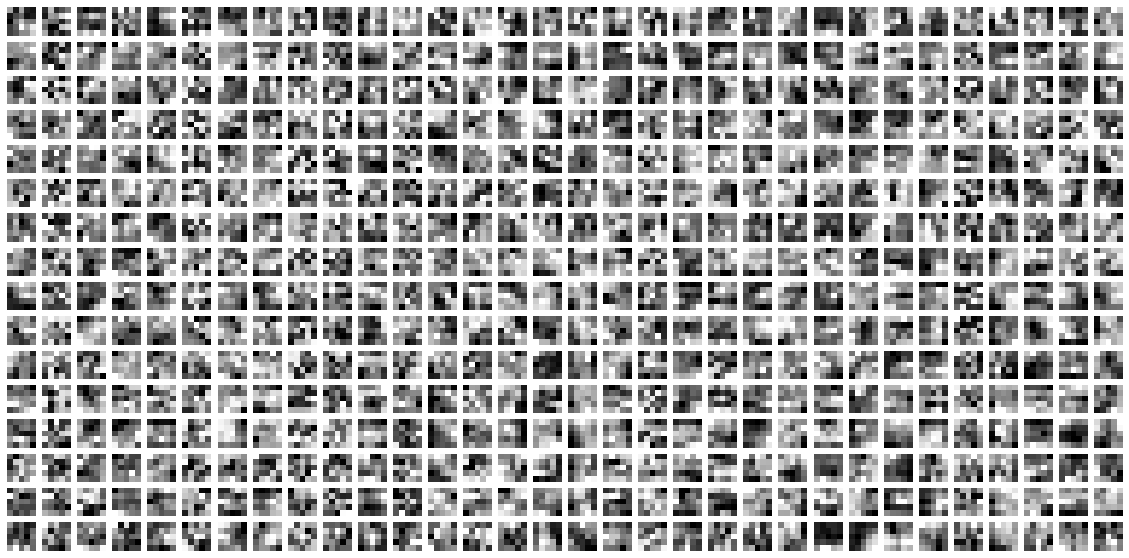

In [ ]:
nw2 = len(net.conv2.weight)
plt.figure(figsize=(20,10))
for index in range(nw2):
    for ichan in range(nw1):
      plt.subplot(nw1, nw2, nw2 * ichan + index + 1)
      plt.axis('off')
      plt.imshow(net.conv2.weight[index].cpu().detach().numpy().squeeze()[ichan,:], cmap='gray_r')
plt.show()

## Display the feature maps after each layer

We recall the forward function which show the different layer

```
def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = nn.LogSoftmax(dim=1)(x)
        return x
```



In [ ]:
testloader = torch.utils.data.DataLoader(testset, batch_size=1000,
                                         shuffle=True, num_workers=2)
dataiter = iter(testloader)
images, labels = dataiter.next()

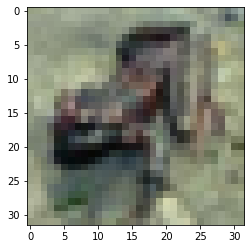

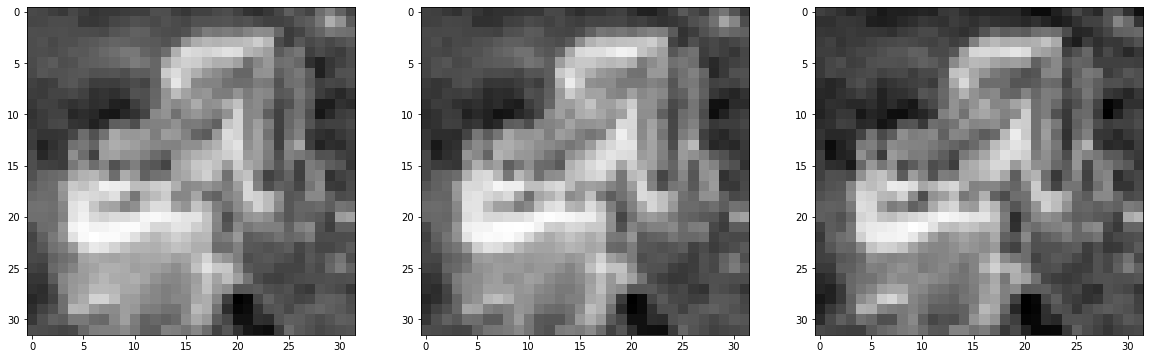

In [ ]:
indexim = 0
imshow(torchvision.utils.make_grid(images[indexim,:,:]).cpu().detach())

plt.figure(figsize=(20,10))
for index in range(3):
      plt.subplot(1, 3, index + 1)
      plt.imshow(images[indexim,index,:].cpu().detach().numpy().squeeze(), cmap='gray_r')
plt.show()

Dimension before 3072


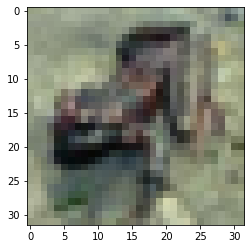

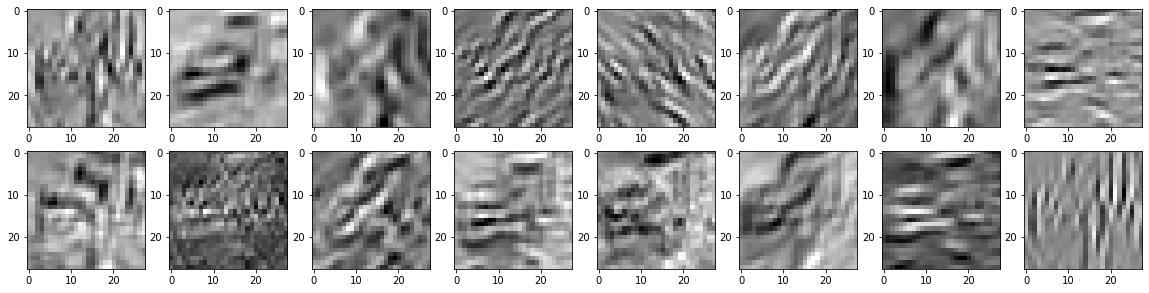

In [ ]:
print("Dimension before",32*32*3)
x = net.conv1(images.to(device))
imshow(torchvision.utils.make_grid(images[indexim,:,:]).cpu().detach())

plt.figure(figsize=(20,10))
for index in range(16):
      plt.subplot(4, 8, index + 1)
      plt.imshow(x[indexim,index,:].cpu().detach().numpy().squeeze(), cmap='gray_r')
plt.show()




Dimension before 12544


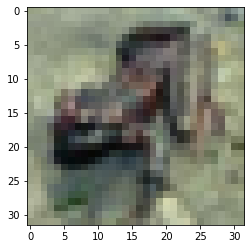

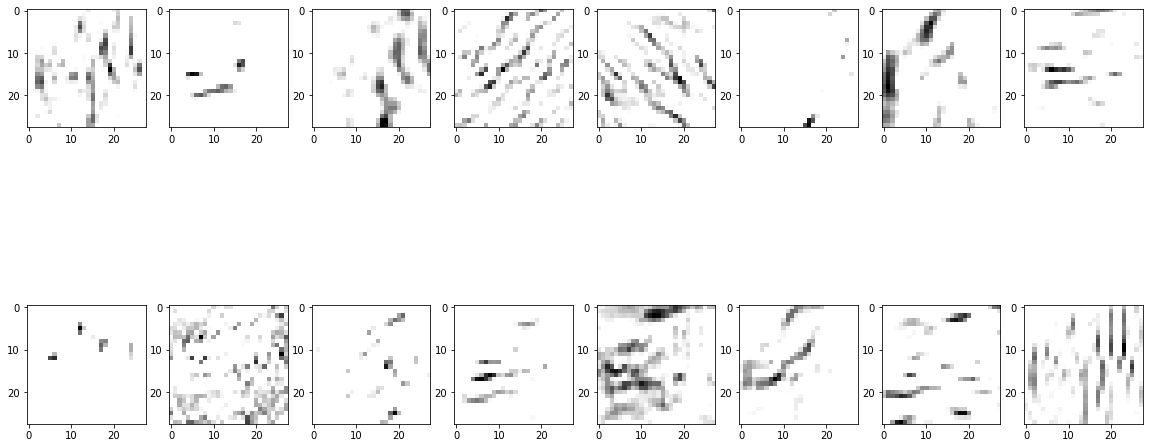

In [ ]:
print("Dimension before",28*28*16)
x = F.relu(x)
imshow(torchvision.utils.make_grid(images[indexim,:,:]).cpu().detach())

plt.figure(figsize=(20,10))
for index in range(16):
      plt.subplot(2, 8, index + 1)
      #plt.axis('off')
      plt.imshow(x[indexim,index,:].cpu().detach().numpy().squeeze(), cmap='gray_r')
plt.show()



Dimension before 12544


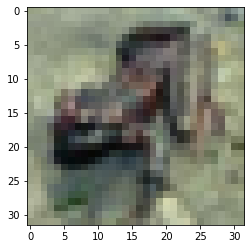

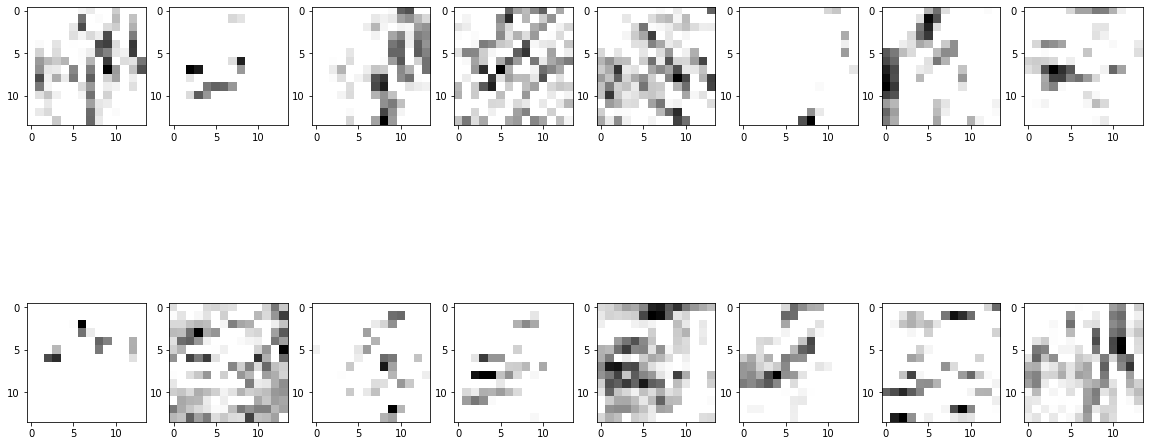

In [ ]:
print("Dimension before",28*28*16)
x = net.pool(x)

imshow(torchvision.utils.make_grid(images[indexim,:,:]).cpu().detach())

plt.figure(figsize=(20,10))
for index in range(16):

      plt.subplot(2, 8, index + 1)
      #plt.axis('off')
      plt.imshow(x[indexim,index,:].cpu().detach().numpy().squeeze(), cmap='gray_r')
plt.show()

Dimension before 3136


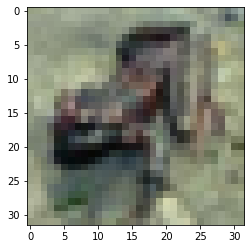

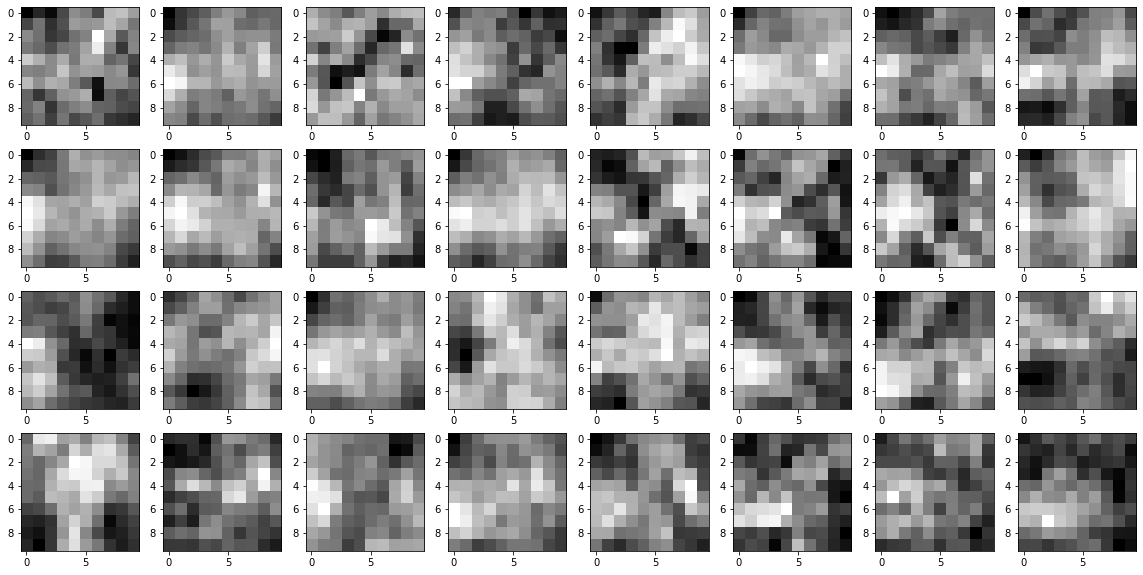

In [ ]:
print("Dimension before",14*14*16)
x = net.conv2(x)

imshow(torchvision.utils.make_grid(images[indexim,:,:]).cpu().detach())

plt.figure(figsize=(20,10))
for index in range(32):

      plt.subplot(4, 8, index + 1)
      #plt.axis('off')
      plt.imshow(x[indexim,index,:].cpu().detach().numpy().squeeze(), cmap='gray_r')
plt.show()

Dimension before 3200


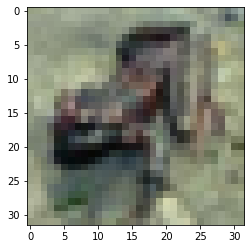

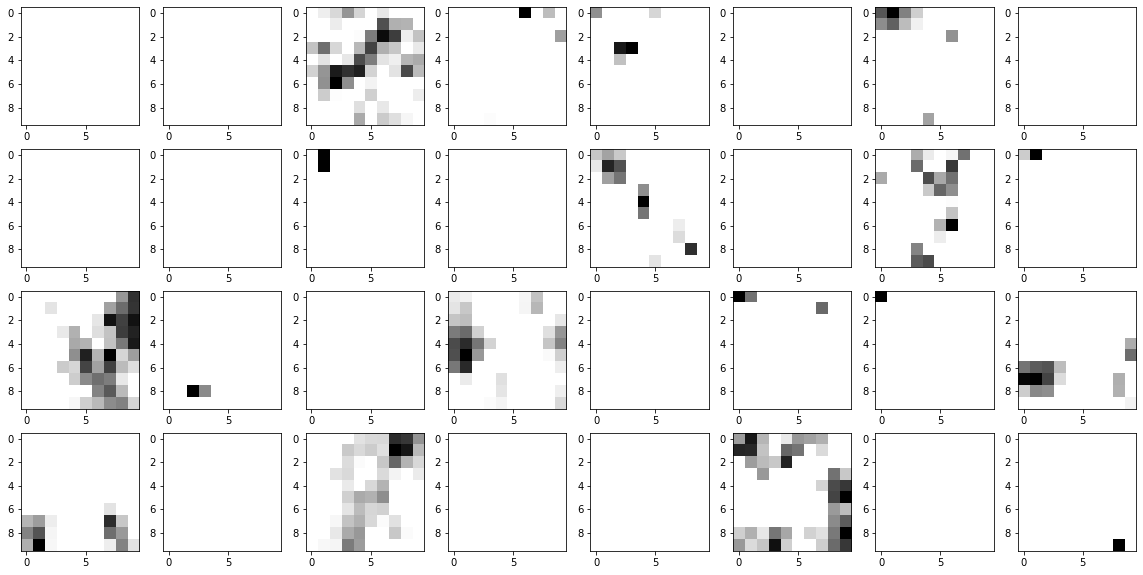

In [ ]:
print("Dimension before",10*10*32)
x = F.relu(x)

imshow(torchvision.utils.make_grid(images[indexim,:,:]).cpu().detach())

plt.figure(figsize=(20,10))
for index in range(32):

      plt.subplot(4, 8, index + 1)
      #plt.axis('off')
      plt.imshow(x[indexim,index,:].cpu().detach().numpy().squeeze(), cmap='gray_r')
plt.show()

Dimension before 800


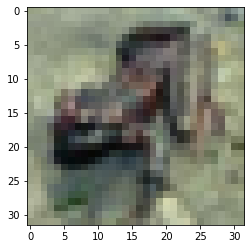

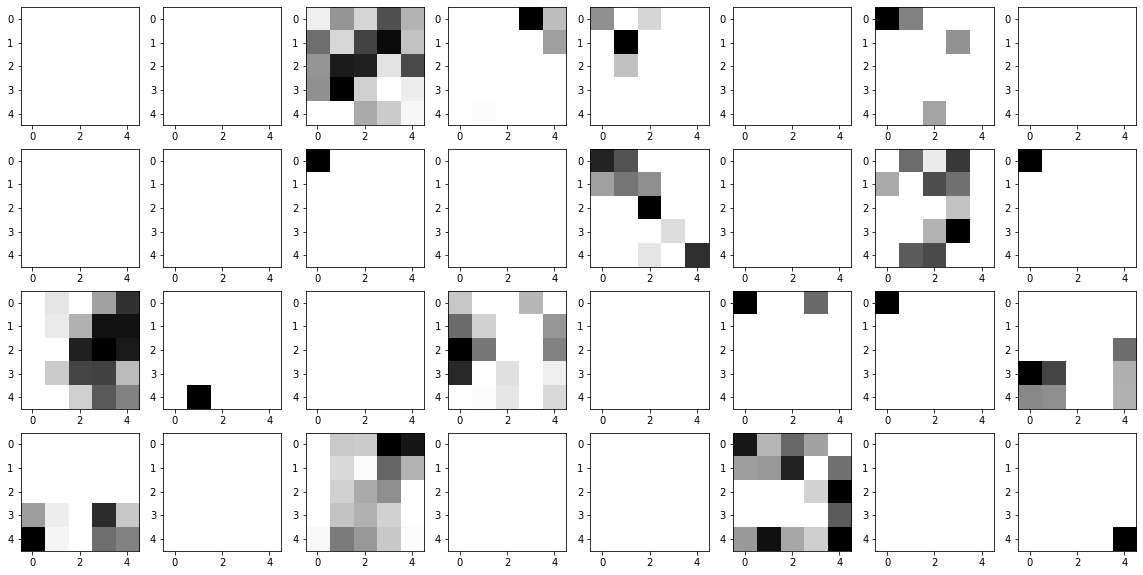

In [ ]:
print("Dimension before",5*5*32)
x = net.pool(x)

imshow(torchvision.utils.make_grid(images[indexim,:,:]).cpu().detach())

plt.figure(figsize=(20,10))
for index in range(32):

      plt.subplot(4, 8, index + 1)
      #plt.axis('off')
      plt.imshow(x[indexim,index,:].cpu().detach().numpy().squeeze(), cmap='gray_r')
plt.show()